In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


In [2]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False, num_workers=2)


100%|██████████| 170498071/170498071 [00:13<00:00, 13081223.25it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 8, 3, stride=1, padding=0),
            nn.ReLU(),
            nn.Conv2d(8, 8, 3, stride=1, padding=0),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 8, 3, stride=1, padding=0),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 3, 3, stride=1, padding=0),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = AutoEncoder()


Epoch 1, Loss: 0.014601220938377082
Epoch 2, Loss: 0.005229115745052695
Epoch 3, Loss: 0.004174662129953504
Epoch 4, Loss: 0.003803352466784418
Epoch 5, Loss: 0.0035697388048283756
Epoch 6, Loss: 0.003377991711720824
Epoch 7, Loss: 0.0032122117625549436
Epoch 8, Loss: 0.003062618295662105
Epoch 9, Loss: 0.00296307432372123
Epoch 10, Loss: 0.002868095868267119
Epoch 11, Loss: 0.0027958737895824016
Epoch 12, Loss: 0.0027360615772195162
Epoch 13, Loss: 0.002686966903042048
Epoch 14, Loss: 0.0026395403319038452
Epoch 15, Loss: 0.002577871643938124
Epoch 16, Loss: 0.0025307906991802157
Epoch 17, Loss: 0.0024933115825988353
Epoch 18, Loss: 0.002447979526594281
Epoch 19, Loss: 0.0024107228466309608
Epoch 20, Loss: 0.002370480545796454
Epoch 21, Loss: 0.002336017881752923
Epoch 22, Loss: 0.0022962030179332943
Epoch 23, Loss: 0.002254479171242565
Epoch 24, Loss: 0.002224514584988356
Epoch 25, Loss: 0.0021836624157149345
Epoch 26, Loss: 0.0021426237472333015
Epoch 27, Loss: 0.0021252301514614372

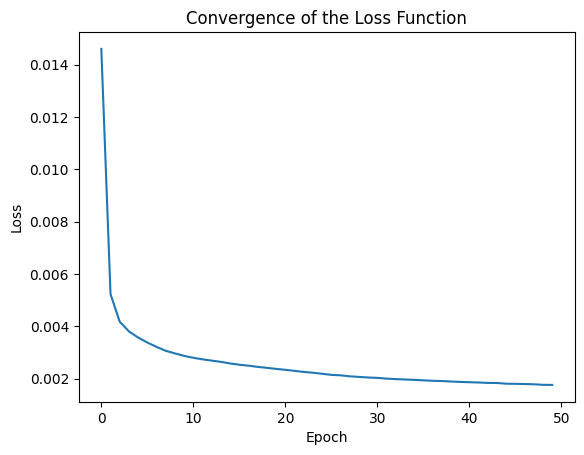

In [4]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 50
loss_values = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, _ = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    loss_values.append(running_loss / (i + 1))
    print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}")

plt.plot(loss_values)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Convergence of the Loss Function")
plt.show()


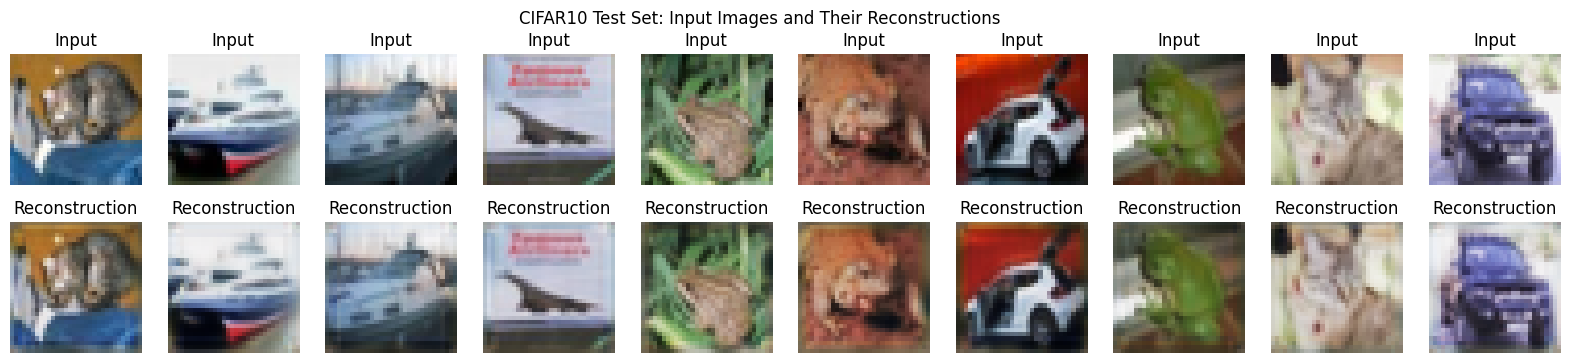

In [5]:
model.eval()
test_images, reconstructions = [], []

with torch.no_grad():
    for data in testloader:
        images, _ = data
        outputs = model(images)
        test_images.extend(images)
        reconstructions.extend(outputs)
        if len(test_images) >= 10:
            break

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 4))

for i in range(10):
    axes[0, i].imshow(test_images[i].permute(1, 2, 0))
    axes[0, i].set_title("Input")
    axes[0, i].axis("off")
    axes[1, i].imshow(reconstructions[i].permute(1, 2, 0))
    axes[1, i].set_title("Reconstruction")
    axes[1, i].axis("off")

plt.suptitle("CIFAR10 Test Set: Input Images and Their Reconstructions")
plt.show()



#Part 2

In [6]:
def add_gaussian_noise(image, mean=0, std_dev=0.1):
    noise = torch.randn(image.size()) * std_dev + mean
    noisy_image = image + noise
    return torch.clamp(noisy_image, -1, 1)

Epoch 1, Loss: 0.0036806834414601325
Epoch 2, Loss: 0.003416144371032715
Epoch 3, Loss: 0.0033453427497297525
Epoch 4, Loss: 0.0033299991050735117
Epoch 5, Loss: 0.0032871756069362164
Epoch 6, Loss: 0.0032764683775603773
Epoch 7, Loss: 0.0032638711468316616
Epoch 8, Loss: 0.00325532834790647
Epoch 9, Loss: 0.003236307853832841
Epoch 10, Loss: 0.0032273474102839828
Epoch 11, Loss: 0.003226542516145855
Epoch 12, Loss: 0.003218160576187074
Epoch 13, Loss: 0.0032069117496721445
Epoch 14, Loss: 0.003192145200446248
Epoch 15, Loss: 0.0031935904691927134
Epoch 16, Loss: 0.003185972913634032
Epoch 17, Loss: 0.003185035426169634
Epoch 18, Loss: 0.0031697282530367375
Epoch 19, Loss: 0.003171072525437921
Epoch 20, Loss: 0.0031606442173942925
Epoch 21, Loss: 0.00315706532727927
Epoch 22, Loss: 0.0031595809413120153
Epoch 23, Loss: 0.003159707094542682
Epoch 24, Loss: 0.0031306270114146175
Epoch 25, Loss: 0.0031460358393378554
Epoch 26, Loss: 0.003134984635747969
Epoch 27, Loss: 0.00313765448564663

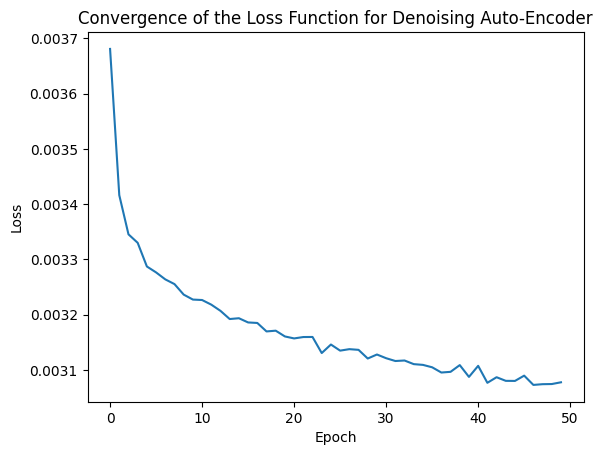

In [7]:
num_epochs = 50
loss_values_denoising = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, _ = data
        noisy_inputs = add_gaussian_noise(inputs)
        optimizer.zero_grad()
        outputs = model(noisy_inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    loss_values_denoising.append(running_loss / (i + 1))
    print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}")

plt.plot(loss_values_denoising)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Convergence of the Loss Function for Denoising Auto-Encoder")
plt.show()


In [8]:
test_images, noisy_test_images, denoised_images = [], [], []

with torch.no_grad():
    for data in testloader:
        images, _ = data
        noisy_images = add_gaussian_noise(images)
        outputs = model(noisy_images)
        test_images.extend(images)
        noisy_test_images.extend(noisy_images)
        denoised_images.extend(outputs)
        if len(test_images) >= 10:
            break




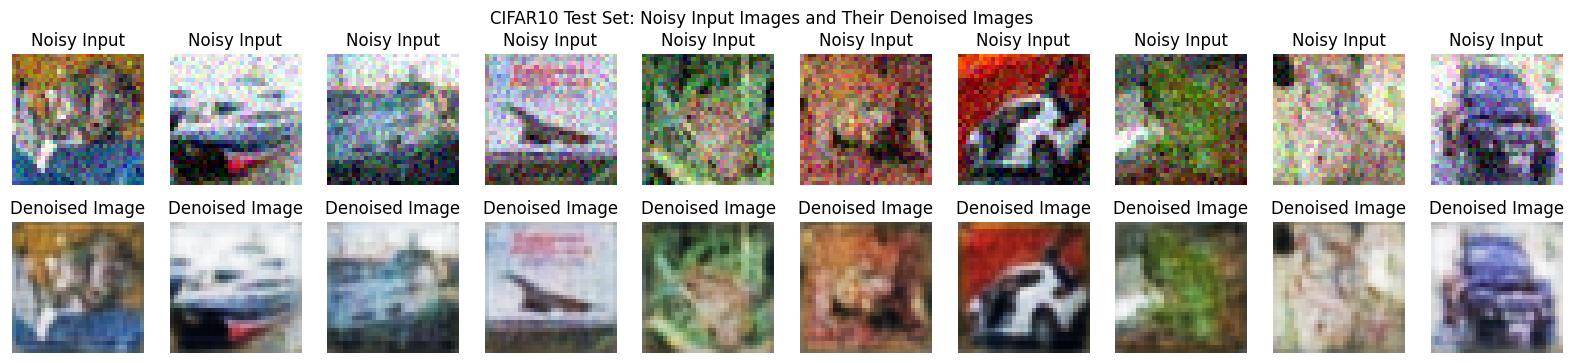

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 4))

for i in range(10):
    axes[0, i].imshow(noisy_test_images[i].permute(1, 2, 0).clamp(0, 1))
    axes[0, i].set_title("Noisy Input")
    axes[0, i].axis("off")
    axes[1, i].imshow(denoised_images[i].permute(1, 2, 0).clamp(0, 1))
    axes[1, i].set_title("Denoised Image")
    axes[1, i].axis("off")

plt.suptitle("CIFAR10 Test Set: Noisy Input Images and Their Denoised Images")
plt.show()

In [10]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

psnr_values, ssim_values = [], []

for i in range(len(test_images)):
    original_image = test_images[i].permute(1, 2, 0).clamp(0, 1).numpy()
    denoised_image = denoised_images[i].permute(1, 2, 0).clamp(0, 1).numpy()
    psnr_values.append(psnr(original_image, denoised_image, data_range=1))
    ssim_values.append(ssim(original_image, denoised_image, multichannel=True))

mean_psnr = np.mean(psnr_values)
mean_ssim = np.mean(ssim_values)

print(f"Mean PSNR: {mean_psnr:.2f}")
print(f"Mean SSIM: {mean_ssim:.4f}")

Mean PSNR: 24.86
Mean SSIM: 0.9045


<ipython-input-10-ff86ee65fc9c>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_values.append(ssim(original_image, denoised_image, multichannel=True))
